In [15]:
import random

import matplotlib.pyplot as plt
from scipy.stats import norm

# Задача 2. Вариант 3.

Тоже как и в первом упражнении нужно решить аналитически и написать скрипт, вычисляющий вероятность приближенно по методу Монте-Карло. Дополнительный вопрос о поиске числа итерация тоже имеет место быть.

На отрезке длины l независимо одна от другой поставлены две точки, положение каждой из которых равновозможно на этом отрезке. Определить вероятность того, что из трех получившихся частей одного отрезка можно построить треугольник.

## Геометрический смысл
$$
    \begin{cases}
        0 \leq x < \frac{1}{2} \\
        \frac{1}{2} < y \leq 1 \\
        x \leq y \\
        y < x + \frac{1}{2}
    \end{cases}
$$


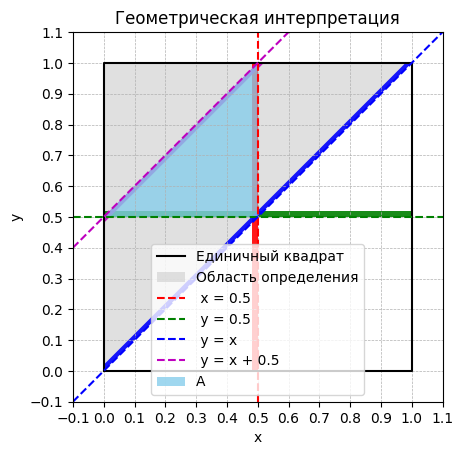

In [16]:
fig, ax = plt.subplots()

ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k-', label='Единичный квадрат')
ax.fill([0, 1, 0], [0, 1, 1], 'lightgrey', alpha=0.7, edgecolor='none', label='Область определения')

ax.plot([0.5, 0.5], [-0.1, 1.1], 'r--', label=' x = 0.5')  # x < 0.5
ax.fill([0.5, 0.5, 0.48, 0.48], [0, 1, 1, 0], 'r', alpha=0.9, edgecolor='none')

ax.plot([-0.1, 1.1], [0.5, 0.5], 'g--', label=' y = 0.5')  # y > 0.5
ax.fill([0, 1, 1, 0], [0.5, 0.5, 0.52, 0.52], 'g', alpha=0.9, edgecolor='none')

ax.plot([-0.1, 1.1], [-0.1, 1.1], 'b--', label=' y = x')  # y <= x
ax.fill([0, 1, 0.98, 0], [0, 1, 1, 0.02], 'b', alpha=0.9, edgecolor='none')

ax.plot([-0.1, 1.1], [0.4, 1.6], 'm--', label=' y = x + 0.5')  # y < x + 0.5
ax.fill([0, 0.5, 0.52, 0], [0.5, 1, 1, 0.48], 'm', alpha=0.9, edgecolor='none')

x_fill = [0, 0.5, 0.5]
y_fill = [0.5, 1, 0.5]
ax.fill(x_fill, y_fill, 'skyblue', alpha=0.8, label='A')

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Геометрическая интерпретация')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xticks([round(x * 0.1, 1) for x in range(-1, 12)])
ax.set_yticks([round(y * 0.1, 1) for y in range(-1, 12)])
ax.legend()

plt.show()

## Аналитическое решение.
$$
    \boxed{P(A) = \frac{1}{4}}
$$

In [17]:
def one_simulation():
    """Проводит одну симуляцию и возвращает True, если из трех частей отрезка можно построить треугольник."""
    x = random.random()
    y = random.random()
    u = min(x, y)
    v = max(x, y)
    a = u
    b = v - u
    c = 1 - v
    return a + b > c and a + c > b and b + c > a


In [18]:
def monte_carlo(trials):
    """Возвращает приближенную вероятность того, что из трех частей отрезка можно построить треугольник методом Монте-Карло."""
    success = 0
    for _ in range(trials):
        if one_simulation():
            success += 1
    return success / trials


## Оценка числа итераций

Нам известно $P(A) = \frac{1}{4}$.

Для достижения заданной точности $ε$ с доверительной вероятностью $1 - α$, необходимо провести $N$ испытаний, где $N$ определяется формулой:

$$
\boxed{
N = \lceil \frac{z_{1 - \frac{α}{2}}^2
\cdot \frac{1}{4} \cdot (1 - \frac{1}{4})}{ε^2} \rceil
 = \lceil \frac{3 z_{1 - \frac{α}{2}}^2}{64 ε^2} \rceil
 }
$$

In [19]:
def N_required(epsilon, alpha):
    """Возвращает необходимое число испытаний для достижения заданной точности epsilon с доверительной вероятностью 1 - alpha."""
    p = 1 / 4
    z_alpha_2 = norm.ppf(1 - alpha / 2)
    N = (z_alpha_2 ** 2 * p * (1 - p)) / (epsilon ** 2)
    return int(N) + 1

## Пример 1.
ε = 0.1
α = 0.1

In [25]:
eps = 0.1
alpha = 0.1
trials = N_required(eps, alpha)
print(f"Необходимое число испытаний для достижения точности {eps} с доверительной вероятностью {1 - alpha}: {trials}")

print(f"Аналитическое решение: P(A_M) = {1 / 4:.2f}")
for _ in range(5):
    print(f"Метод Монте-Карло: P(A_M) = {monte_carlo(trials):.2f} ")

Необходимое число испытаний для достижения точности 0.1 с доверительной вероятностью 0.9: 51
Аналитическое решение: P(A_M) = 0.25
Метод Монте-Карло: P(A_M) = 0.33 
Метод Монте-Карло: P(A_M) = 0.16 
Метод Монте-Карло: P(A_M) = 0.27 
Метод Монте-Карло: P(A_M) = 0.22 
Метод Монте-Карло: P(A_M) = 0.20 


## Пример 2.
ε = 0.1
α = 0.01

In [26]:
eps = 0.1
alpha = 0.01
trials = N_required(eps, alpha)
print(f"Необходимое число испытаний для достижения точности {eps} с доверительной вероятностью {1 - alpha}: {trials}")

print(f"Аналитическое решение: P(A_M) = {1 / 4:.2f}")
for _ in range(5):
    print(f"Метод Монте-Карло: P(A_M) = {monte_carlo(trials):.2f} ")

Необходимое число испытаний для достижения точности 0.1 с доверительной вероятностью 0.99: 125
Аналитическое решение: P(A_M) = 0.25
Метод Монте-Карло: P(A_M) = 0.18 
Метод Монте-Карло: P(A_M) = 0.22 
Метод Монте-Карло: P(A_M) = 0.26 
Метод Монте-Карло: P(A_M) = 0.23 
Метод Монте-Карло: P(A_M) = 0.19 


## Пример 3.
ε = 0.01
α = 0.001

In [29]:
eps = 0.01
alpha = 0.001
trials = N_required(eps, alpha)
print(f"Необходимое число испытаний для достижения точности {eps} с доверительной вероятностью {1 - alpha}: {trials}")
print(f"Аналитическое решение: P(A_M) = {1 / 4:.2f}")
print(f"Метод Монте-Карло: P(A_M) = {monte_carlo(trials):.4f} при {trials} испытаниях")

Необходимое число испытаний для достижения точности 0.01 с доверительной вероятностью 0.999: 20302
Аналитическое решение: P(A_M) = 0.25
Метод Монте-Карло: P(A_M) = 0.2491 при 20302 испытаниях
